# Simple Stock Price Prediction (GME)

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
gme = yf.Ticker('GME')
gme = gme.history(period='max')

gme.to_csv('data/gme.csv')

In [3]:
gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2022-10-24,25.000000,25.190001,24.110001,24.709999,3114300,0.0,0.0
2022-10-25,24.820000,27.790001,24.799999,26.870001,7791600,0.0,0.0
2022-10-26,26.370001,27.480000,25.320000,25.420000,3858200,0.0,0.0


In [4]:
gme = gme.drop(columns=['Dividends', 'Stock Splits'])

gme

,Open,High,Low,Close,Volume
Date,,,,,
2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600
2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400
2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800
...,...,...,...,...,...
2022-10-24,25.000000,25.190001,24.110001,24.709999,3114300
2022-10-25,24.820000,27.790001,24.799999,26.870001,7791600
2022-10-26,26.370001,27.480000,25.320000,25.420000,3858200


<AxesSubplot:xlabel='Date'>

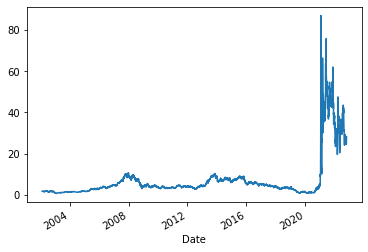

In [5]:
gme['Close'].plot()

In [6]:
import pandas as pd

output_var = pd.DataFrame(gme['Close'])

features = ['Open', 'High', 'Low', 'Volume']

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(gme[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=gme.index)
feature_transform

,Open,High,Low,Volume
Date,,,,
2002-02-13,0.010355,0.008502,0.013455,0.096345
2002-02-14,0.011337,0.008691,0.014387,0.013650
2002-02-15,0.011024,0.008453,0.014212,0.010312
2002-02-19,0.010846,0.008278,0.013106,0.009070
2002-02-20,0.010310,0.008243,0.013455,0.008413
...,...,...,...,...
2022-10-24,0.258329,0.204181,0.324983,0.003621
2022-10-25,0.256419,0.225834,0.334533,0.009553
2022-10-26,0.272859,0.223252,0.341731,0.004564


In [8]:
from sklearn.model_selection import TimeSeriesSplit

timesplit = TimeSeriesSplit(n_splits=10)

for train_index, test_index in timesplit.split(feature_transform):
    x_train, x_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [9]:
import numpy as np

train_x = np.array(x_train)
test_x = np.array(x_test)

x_train = train_x.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = test_x.reshape(x_test.shape[0], 1, x_test.shape[1])

In [10]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, train_x.shape[1]), activation='relu', return_sequences=False))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=75, batch_size=8, verbose=1, shuffle=False)

Epoch 1/75
593/593 [==============================] - 1s 818us/step - loss: 10.8755
Epoch 2/75
593/593 [==============================] - 0s 787us/step - loss: 3.5097
Epoch 3/75
593/593 [==============================] - 0s 762us/step - loss: 3.0680
Epoch 4/75
593/593 [==============================] - 0s 796us/step - loss: 2.6432
Epoch 5/75
593/593 [==============================] - 0s 757us/step - loss: 2.1787
Epoch 6/75
593/593 [==============================] - 0s 782us/step - loss: 1.6845
Epoch 7/75
593/593 [==============================] - 0s 803us/step - loss: 1.1970
Epoch 8/75
593/593 [==============================] - 0s 786us/step - loss: 0.7737
Epoch 9/75
593/593 [==============================] - 0s 786us/step - loss: 0.4563
Epoch 10/75
593/593 [==============================] - 0s 754us/step - loss: 0.2499
Epoch 11/75
593/593 [==============================] - 0s 767us/step - loss: 0.1313
Epoch 12/75
593/593 [==============================] - 0s 755us/step - loss: 0.0695


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM Value')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()